# Objectives
#### 1.Least median salary area
#### 
#### 2.Most median salary area
#### 
#### 3.Most variation in salary
####
#### 4.Min variation in salary

In [30]:
import pandas as pd
import matplotlib as plt 
import numpy as np
import folium
from folium import FeatureGroup
from matplotlib import rcParams
import seaborn as sns 
%matplotlib inline

In [31]:
df=pd.read_csv("kaggle_income.csv")

# Steps in Data Exploration and Preprocessing:
#### Identification of variables and data types
#### Removing Redundant Variables
#### Non-Graphical Univariate Analysis
#### Graphical Univariate Analysis
#### Bivariate Analysis
#### Variable transformations
#### Missing value treatment
#### Outlier treatment
#### Dimensionality Reduction

### Identifying variables and understanding data

In [32]:
df.columns

Index(['id', 'State_Code', 'State_Name', 'State_ab', 'County', 'City', 'Place',
       'Type', 'Primary', 'Zip_Code', 'Area_Code', 'ALand', 'AWater', 'Lat',
       'Lon', 'Mean', 'Median', 'Stdev', 'sumw'],
      dtype='object')

In [33]:
#Converting id,State_Code,Zip_Code to int64
df['id']=df['id'].astype(object)
df['State_Code']=df['State_Code'].astype(object)
df['Zip_Code']=df['Zip_Code'].astype(object)


In [34]:
df.dtypes

id             object
State_Code     object
State_Name     object
State_ab       object
County         object
City           object
Place          object
Type           object
Primary        object
Zip_Code       object
Area_Code      object
ALand           int64
AWater          int64
Lat           float64
Lon           float64
Mean            int64
Median          int64
Stdev           int64
sumw          float64
dtype: object

In [35]:
df.shape


(32526, 19)

### Removing Redundant Variables

In [36]:
#ALand and AWater and sumw are redundant
df=df.drop(columns=["ALand","AWater","sumw"])

In [37]:
df.head()

id State_Code State_Name State_ab          County            City  \
0  1011000          1    Alabama       AL   Mobile County       Chickasaw   
1  1011010          1    Alabama       AL  Barbour County      Louisville   
2  1011020          1    Alabama       AL   Shelby County      Columbiana   
3  1011030          1    Alabama       AL   Mobile County         Satsuma   
4  1011040          1    Alabama       AL   Mobile County  Dauphin Island   

             Place  Type Primary Zip_Code Area_Code        Lat        Lon  \
0   Chickasaw city  City   place    36611       251  30.771450 -88.079697   
1        Clio city  City   place    36048       334  31.708516 -85.611039   
2  Columbiana city  City   place    35051       205  33.191452 -86.615618   
3      Creola city  City   place    36572       251  30.874343 -88.009442   
4   Dauphin Island  Town   place    36528       251  30.250913 -88.171268   

    Mean  Median  Stdev  
0  38773   30506  33101  
1  37725   19528  43789  
2  54606   31930  57348  
3  63919   52814  47707  
4  77948   67225  54270

### Non Graphical Univariate Analysis

In [38]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

Lat           Lon           Mean         Median          Stdev
count  32526.000000  32526.000000   32526.000000   32526.000000   32526.000000
mean      37.731983    -91.303844   66703.986042   85452.938818   47273.695321
std        5.579450     16.227588   30451.194599   87810.895132   16555.486882
min       17.929085   -175.860041       0.000000       0.000000       0.000000
25%       34.013469    -97.664034   46015.500000   36046.250000   36075.000000
50%       38.925588    -87.139280   60738.000000   51874.500000   46179.000000
75%       41.495793    -79.852969   82223.500000   80915.000000   58078.000000
max       71.253500    -65.500823  242857.000000  300000.000000  113936.000000

In [39]:
#Checking for number of unique values
df.nunique(axis=0)

id            32526
State_Code       52
State_Name       52
State_ab         52
County         1133
City           8128
Place          2960
Type             10
Primary           2
Zip_Code      14803
Area_Code       272
Lat           30252
Lon           30252
Mean          27143
Median        23626
Stdev         24614
dtype: int64

### Graphical Univariate Analysis

<AxesSubplot:ylabel='Frequency'>

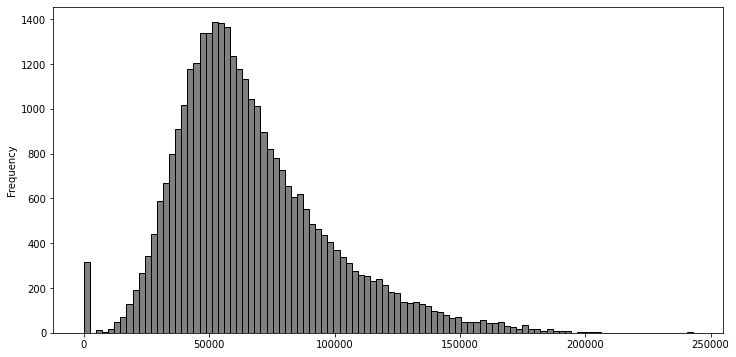

In [40]:
df["Mean"].plot(kind="hist",bins=100,figsize=(12,6),facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

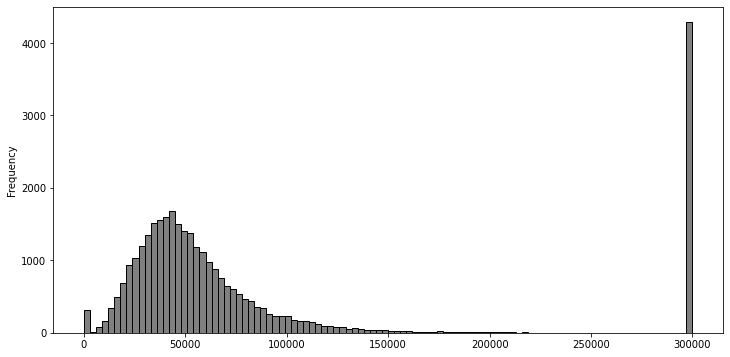

In [41]:
df["Median"].plot(kind="hist",bins=100,figsize=(12,6),facecolor='grey',edgecolor='black')


### Bivariate Analysis

<AxesSubplot:xlabel='State_Name', ylabel='Median'>

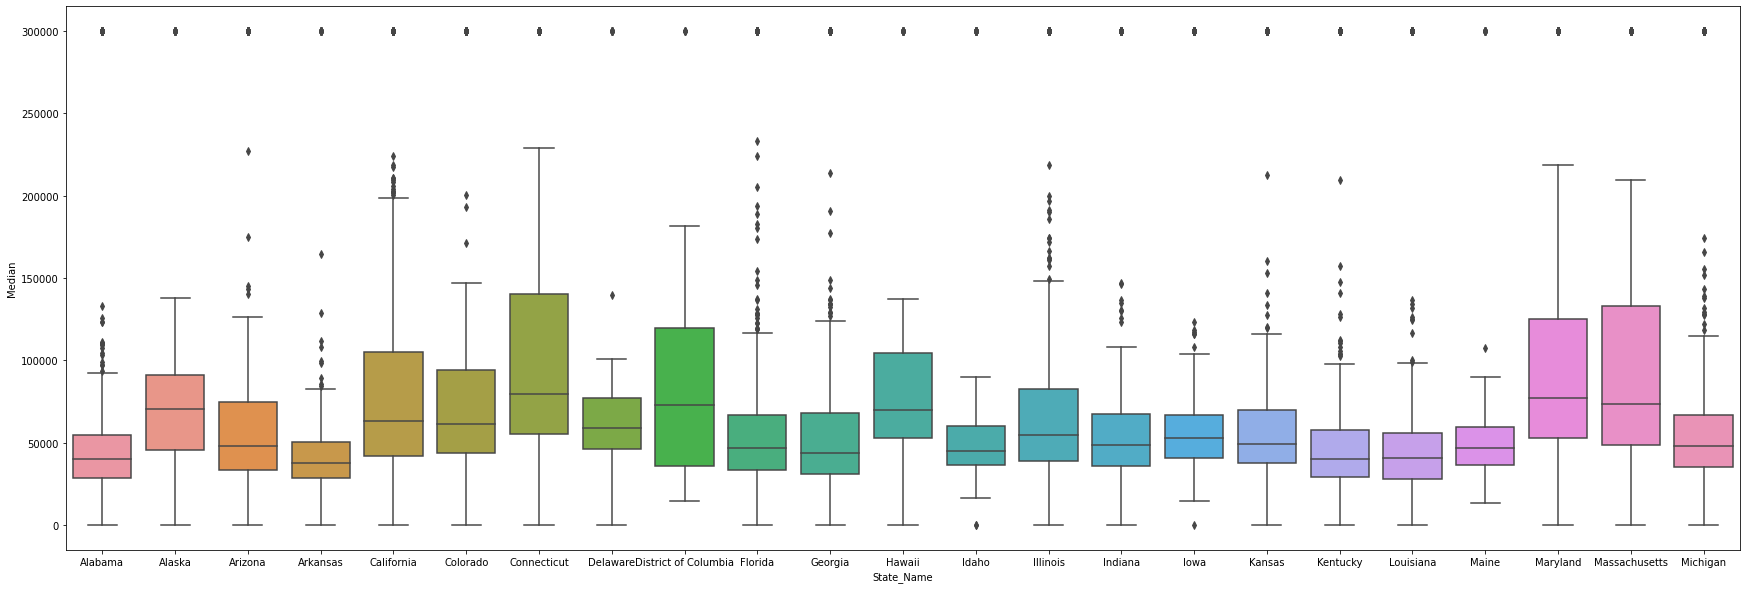

In [42]:
rcParams['figure.figsize'] = 30,10
sns.boxplot(x=df["State_Name"][:15000],y=df["Median"])

#### The Boxplot above shows the presence of outliers

In [43]:
df.corr(method="pearson")

Lat       Lon      Mean    Median     Stdev
Lat     1.000000  0.004664  0.136266  0.086964  0.117045
Lon     0.004664  1.000000 -0.043835 -0.028488 -0.033599
Mean    0.136266 -0.043835  1.000000  0.541713  0.844316
Median  0.086964 -0.028488  0.541713  1.000000  0.329265
Stdev   0.117045 -0.033599  0.844316  0.329265  1.000000

#### From the correlation matrix, it is clear that the median salary is not correlated with anything but mean salary as the correlation coefficient is very less in others

<AxesSubplot:xlabel='Median', ylabel='Mean'>

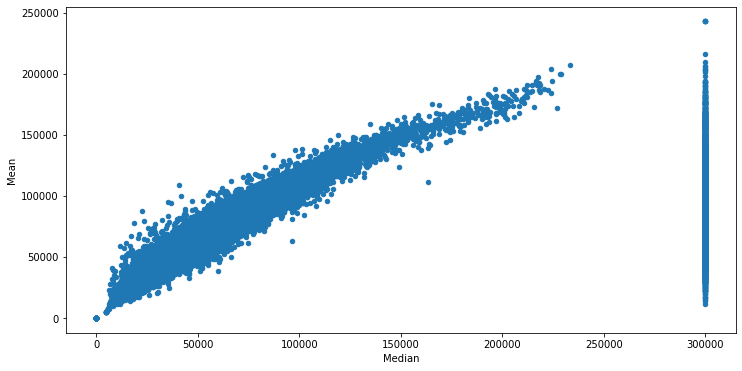

In [44]:
#Strong Correlation
df.plot(kind="scatter",figsize=(12,6),x="Median",y="Mean")

<AxesSubplot:xlabel='Median', ylabel='Lat'>

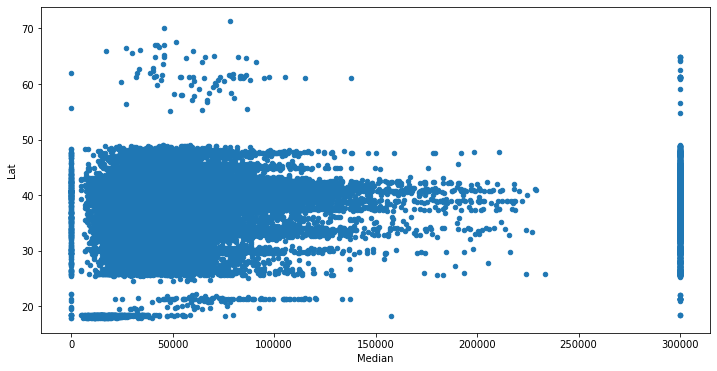

In [45]:
#Negligible Correlation
df.plot(kind="scatter",figsize=(12,6),x="Median",y="Lat")

### Missing Values Treatment

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32526 entries, 0 to 32525
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          32526 non-null  object 
 1   State_Code  32526 non-null  object 
 2   State_Name  32526 non-null  object 
 3   State_ab    32526 non-null  object 
 4   County      32526 non-null  object 
 5   City        32526 non-null  object 
 6   Place       32526 non-null  object 
 7   Type        32526 non-null  object 
 8   Primary     32526 non-null  object 
 9   Zip_Code    32526 non-null  object 
 10  Area_Code   32526 non-null  object 
 11  Lat         32526 non-null  float64
 12  Lon         32526 non-null  float64
 13  Mean        32526 non-null  int64  
 14  Median      32526 non-null  int64  
 15  Stdev       32526 non-null  int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 4.0+ MB


#### Since all the columns are accounted for with no missing values, hence data is clean

### Outliers

In [47]:
df

id State_Code   State_Name State_ab              County  \
0      1011000          1      Alabama       AL       Mobile County   
1      1011010          1      Alabama       AL      Barbour County   
2      1011020          1      Alabama       AL       Shelby County   
3      1011030          1      Alabama       AL       Mobile County   
4      1011040          1      Alabama       AL       Mobile County   
...        ...        ...          ...      ...                 ...   
32521   720296         72  Puerto Rico       PR  Adjuntas Municipio   
32522  7202966         72  Puerto Rico       PR  Adjuntas Municipio   
32523  7202976         72  Puerto Rico       PR  Adjuntas Municipio   
32524  7202986         72  Puerto Rico       PR  Adjuntas Municipio   
32525  7202996         72  Puerto Rico       PR  Adjuntas Municipio   

                 City            Place   Type Primary Zip_Code Area_Code  \
0           Chickasaw   Chickasaw city   City   place    36611       251   
1          Louisville        Clio city   City   place    36048       334   
2          Columbiana  Columbiana city   City   place    35051       205   
3             Satsuma      Creola city   City   place    36572       251   
4      Dauphin Island   Dauphin Island   Town   place    36528       251   
...               ...              ...    ...     ...      ...       ...   
32521        Guaynabo         Adjuntas  Track   Track      970       787   
32522          Aguada         Adjuntas  Track   Track      602       787   
32523          Aguada         Adjuntas  Track   Track      602       787   
32524          Aguada         Adjuntas  Track   Track      602       787   
32525       Aguadilla         Adjuntas  Track   Track      603       787   

             Lat        Lon   Mean  Median  Stdev  
0      30.771450 -88.079697  38773   30506  33101  
1      31.708516 -85.611039  37725   19528  43789  
2      33.191452 -86.615618  54606   31930  57348  
3      30.874343 -88.009442  63919   52814  47707  
4      30.250913 -88.171268  77948   67225  54270  
...          ...        ...    ...     ...    ...  
32521  18.397925 -66.130633  30649   13729  37977  
32522  18.385424 -67.203310  15520    9923  15541  
32523  18.356565 -67.180686  41933   34054  31539  
32524  18.412041 -67.213413      0       0      0  
32525  18.478094 -67.160453  28049   20229  33333  

[32526 rows x 16 columns]

In [48]:
x=df["State_Name"].unique()
x

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

### Removing Outliers

In [49]:
gk=df.groupby("State_Name")

In [50]:
for i in x:
    df1=gk.get_group(i)
    Q1 = df1.Median.quantile(0.25)
    Q3 = df1.Median.quantile(0.75)
    IQR = Q3 - Q1
    df2=df1[(df1.Median < (Q1 - 1.5 * IQR)) |(df1.Median > (Q3 + 1.5 * IQR))]
    df=df.drop(df2.index)
df

id State_Code   State_Name State_ab              County  \
0      1011000          1      Alabama       AL       Mobile County   
1      1011010          1      Alabama       AL      Barbour County   
2      1011020          1      Alabama       AL       Shelby County   
3      1011030          1      Alabama       AL       Mobile County   
4      1011040          1      Alabama       AL       Mobile County   
...        ...        ...          ...      ...                 ...   
32521   720296         72  Puerto Rico       PR  Adjuntas Municipio   
32522  7202966         72  Puerto Rico       PR  Adjuntas Municipio   
32523  7202976         72  Puerto Rico       PR  Adjuntas Municipio   
32524  7202986         72  Puerto Rico       PR  Adjuntas Municipio   
32525  7202996         72  Puerto Rico       PR  Adjuntas Municipio   

                 City            Place   Type Primary Zip_Code Area_Code  \
0           Chickasaw   Chickasaw city   City   place    36611       251   
1          Louisville        Clio city   City   place    36048       334   
2          Columbiana  Columbiana city   City   place    35051       205   
3             Satsuma      Creola city   City   place    36572       251   
4      Dauphin Island   Dauphin Island   Town   place    36528       251   
...               ...              ...    ...     ...      ...       ...   
32521        Guaynabo         Adjuntas  Track   Track      970       787   
32522          Aguada         Adjuntas  Track   Track      602       787   
32523          Aguada         Adjuntas  Track   Track      602       787   
32524          Aguada         Adjuntas  Track   Track      602       787   
32525       Aguadilla         Adjuntas  Track   Track      603       787   

             Lat        Lon   Mean  Median  Stdev  
0      30.771450 -88.079697  38773   30506  33101  
1      31.708516 -85.611039  37725   19528  43789  
2      33.191452 -86.615618  54606   31930  57348  
3      30.874343 -88.009442  63919   52814  47707  
4      30.250913 -88.171268  77948   67225  54270  
...          ...        ...    ...     ...    ...  
32521  18.397925 -66.130633  30649   13729  37977  
32522  18.385424 -67.203310  15520    9923  15541  
32523  18.356565 -67.180686  41933   34054  31539  
32524  18.412041 -67.213413      0       0      0  
32525  18.478094 -67.160453  28049   20229  33333  

[28100 rows x 16 columns]

### Variable Transformation: Not needed
### Dimensionality Reduction : Not needed. 
### All the steps of data analysis have been completed successfully and the data can now be used for further purposes.

### After thorough data analysis and using visualization techniques, I have concluded that:

#### Min median salary state: Puerto Rico
#### Max median salary state: New Jersey
#### Min variation in salary across state: Puerto Rico
#### Max variation in salary across state: District of Columbia